# Ames house prices prediction

# Preparing the data

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from os import getcwd

In [59]:
import datetime as dt

In [60]:
df = pd.read_csv('train.csv')

In [61]:
df.shape

(1460, 81)

In [62]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [63]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Changing 2 date columns into 1 python date

In [64]:
df['DateSold'] = pd.to_datetime(pd.DataFrame({'year': df.YrSold,'month': df.MoSold,'day': 1}))

In [65]:
# df.drop(['YrSold','MoSold'], axis=1, inplace= True)

In [66]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,DateSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2008-02-01
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2007-05-01
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2008-09-01
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2006-02-01
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2008-12-01


Checking target variable has no null values (also there are no 0 zero values as seen in the describe output)

In [67]:
sum(df.SalePrice.notnull())

1460

Now to the rest of the variables. i'm checking if a certain value is na bacause it does not exist (no garage for example) or just because the value is missing. if all garage features don'e exist in a row we can assume there is no garage.
This will have a big impact on filling out the na values.

In [68]:
(df.columns[df.isna().sum().nonzero()])

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [69]:
df1 = df.loc[np.where(df['GarageQual'].isna())]
print(df1.GarageCars.sum())
print(df1.GarageArea.sum())

0
0


In [70]:
df1 = df.loc[np.where(df['PoolArea'].isna())]
print(df1.PoolArea.sum())

0


Row data for the NA i found are zeroed which mean the feature does not exist in the house 
and for the numeric features i can fill 0 instead of null or 'other'/'dont exist' for the non-numeric

In [71]:
with pd.option_context('display.max_rows', 999):
    print(df.dtypes)

Id                        int64
MSSubClass                int64
MSZoning                 object
LotFrontage             float64
LotArea                   int64
Street                   object
Alley                    object
LotShape                 object
LandContour              object
Utilities                object
LotConfig                object
LandSlope                object
Neighborhood             object
Condition1               object
Condition2               object
BldgType                 object
HouseStyle               object
OverallQual               int64
OverallCond               int64
YearBuilt                 int64
YearRemodAdd              int64
RoofStyle                object
RoofMatl                 object
Exterior1st              object
Exterior2nd              object
MasVnrType               object
MasVnrArea              float64
ExterQual                object
ExterCond                object
Foundation               object
BsmtQual                 object
BsmtCond

In [72]:
values = {'LotFrontage': 0, 'Alley': 'NA', 'MasVnrType': 'NA', 'MasVnrArea': 0, 'BsmtQual': 'NA', 'BsmtCond': 'NA'
         , 'BsmtExposure': 'NA', 'BsmtFinType1': 'NA', 'BsmtFinType2': 'NA', 'Electrical': 'NA', 'FireplaceQu': 'NA'
          , 'GarageType': 'NA', 'GarageYrBlt': 'NA', 'GarageFinish': 'NA', 'GarageQual': 3, 'GarageCond': 'NA'
          , 'PoolQC': 'NA', 'Fence': 'NA', 'MiscFeature': 'NA'}
df.fillna(value=values, inplace=True)

In [73]:
(df.columns[df.isna().sum().nonzero()])

Index([], dtype='object')

Filled all NAs , now i can analyze the data

# Data analysis

Sales condition column suggests we have 6 different types of sales, this will be reviewed later

In [74]:
df.SaleCondition.unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

In [75]:
pd.crosstab(index=[df.SaleCondition],columns='count')

col_0,count
SaleCondition,
Abnorml,101
AdjLand,4
Alloca,12
Family,20
Normal,1198
Partial,125


In [76]:
df['TotalSize'] = df['GrLivArea'] + df['TotalBsmtSF'] + df['LotArea'] + df['EnclosedPorch'] + df['GarageArea']

In [77]:
df['LivingArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [78]:
df['UtilitiesArea'] = df['LotArea'] + df['EnclosedPorch'] + df['GarageArea'] + df['PoolArea'] 

In [79]:
import seaborn as sns

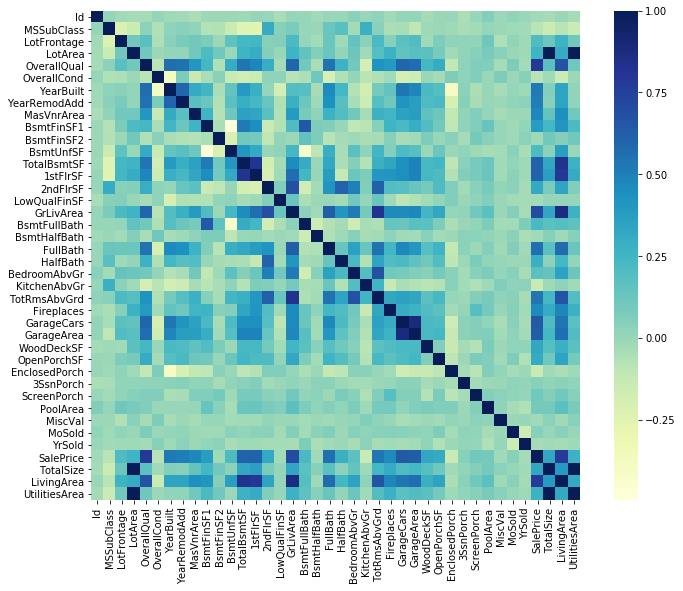

In [80]:
plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(),  cmap="YlGnBu" ,square=True)

Some of the most correlated features with SalesPrice are: Area,
OverallQual, and GarageCars

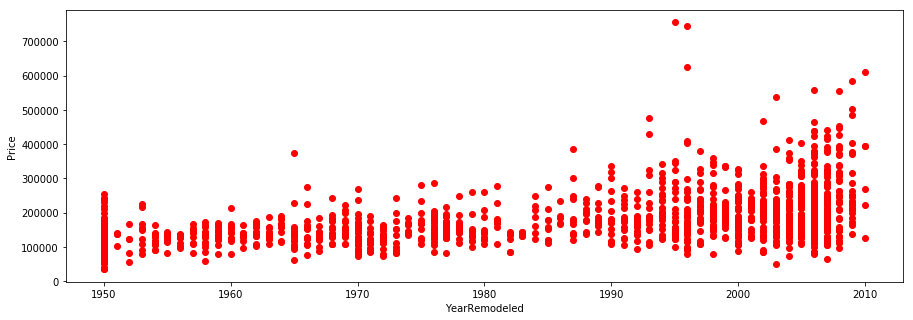

In [81]:
plt.figure(figsize=[15,5])
plt.plot(df.YearRemodAdd,df.SalePrice, 'ro')
plt.xlabel('YearRemodeled')
plt.ylabel('Price')
plt.show()

It looks like most of the data is for newer properties which are also sold for more money - i'll check if the house 'age' has impact on the price - this will also be considered along the remodeling.

In [82]:
df.YearRemodAdd.unique()

array([2003, 1976, 2002, 1970, 2000, 1995, 2005, 1973, 1950, 1965, 2006,
       1962, 2007, 1960, 2001, 1967, 2004, 2008, 1997, 1959, 1990, 1955,
       1983, 1980, 1966, 1963, 1987, 1964, 1972, 1996, 1998, 1989, 1953,
       1956, 1968, 1981, 1992, 2009, 1982, 1961, 1993, 1999, 1985, 1979,
       1977, 1969, 1958, 1991, 1971, 1952, 1975, 2010, 1984, 1986, 1994,
       1988, 1954, 1957, 1951, 1978, 1974], dtype=int64)

In [83]:
df['PropAge'] = df['YrSold'] - df['YearBuilt'] 
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']

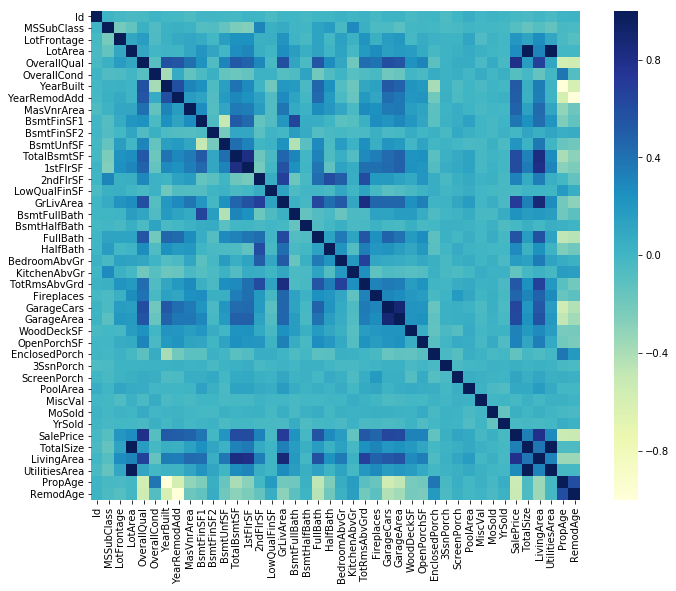

In [84]:
plt.subplots(figsize=(12,9))
sns.heatmap(df.corr(),  cmap="YlGnBu" ,square=True)

Building age is highly (negative) correlated with the price 

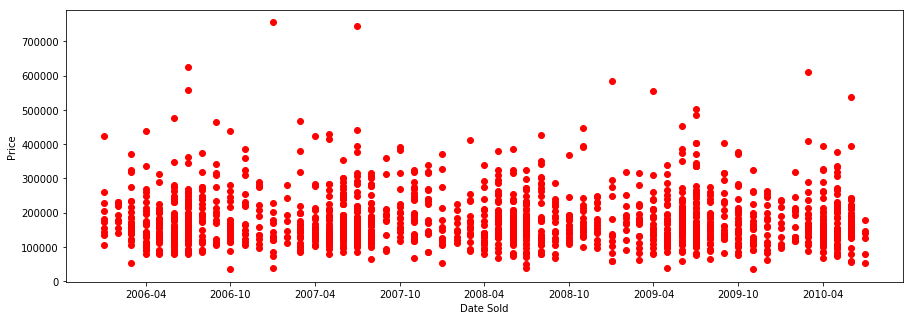

In [85]:
plt.figure(figsize=[15,5])
plt.plot(df.DateSold,df.SalePrice, 'ro')
plt.xlabel('Date Sold')
plt.ylabel('Price')
plt.show()

I checked for 2008 fin crisis effect on the data, the only difference i saw is slightly less deal done but nothing too serious.
However there are several outliers which ill deal with later

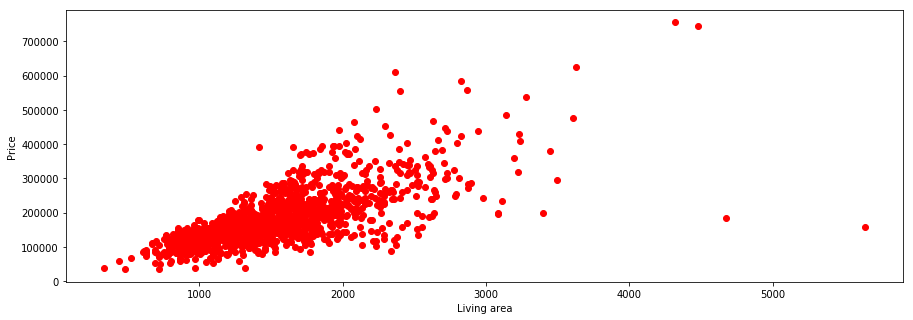

In [86]:
plt.figure(figsize=[15,5])
plt.plot(df.GrLivArea,df.SalePrice, 'ro')
plt.xlabel('Living area')
plt.ylabel('Price')
plt.show()

Plotting price vs live area suggest almost linear correlation between the two, there are 2 outliers which sold for a very low price compared to thier size
Checking total size adds a few more outliers while while the linear correlation remains

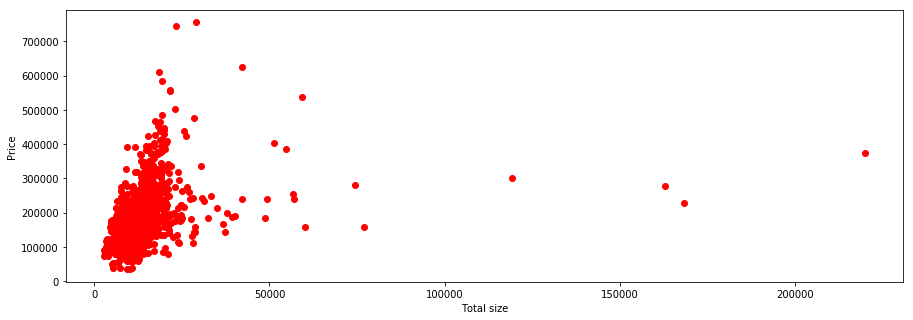

In [87]:
plt.figure(figsize=[15,5])
plt.plot(df.TotalSize,df.SalePrice, 'ro')
plt.xlabel('Total size')
plt.ylabel('Price')
plt.show()

Removing the 2 big outliers

In [88]:
df = df[df.GrLivArea < 4500]

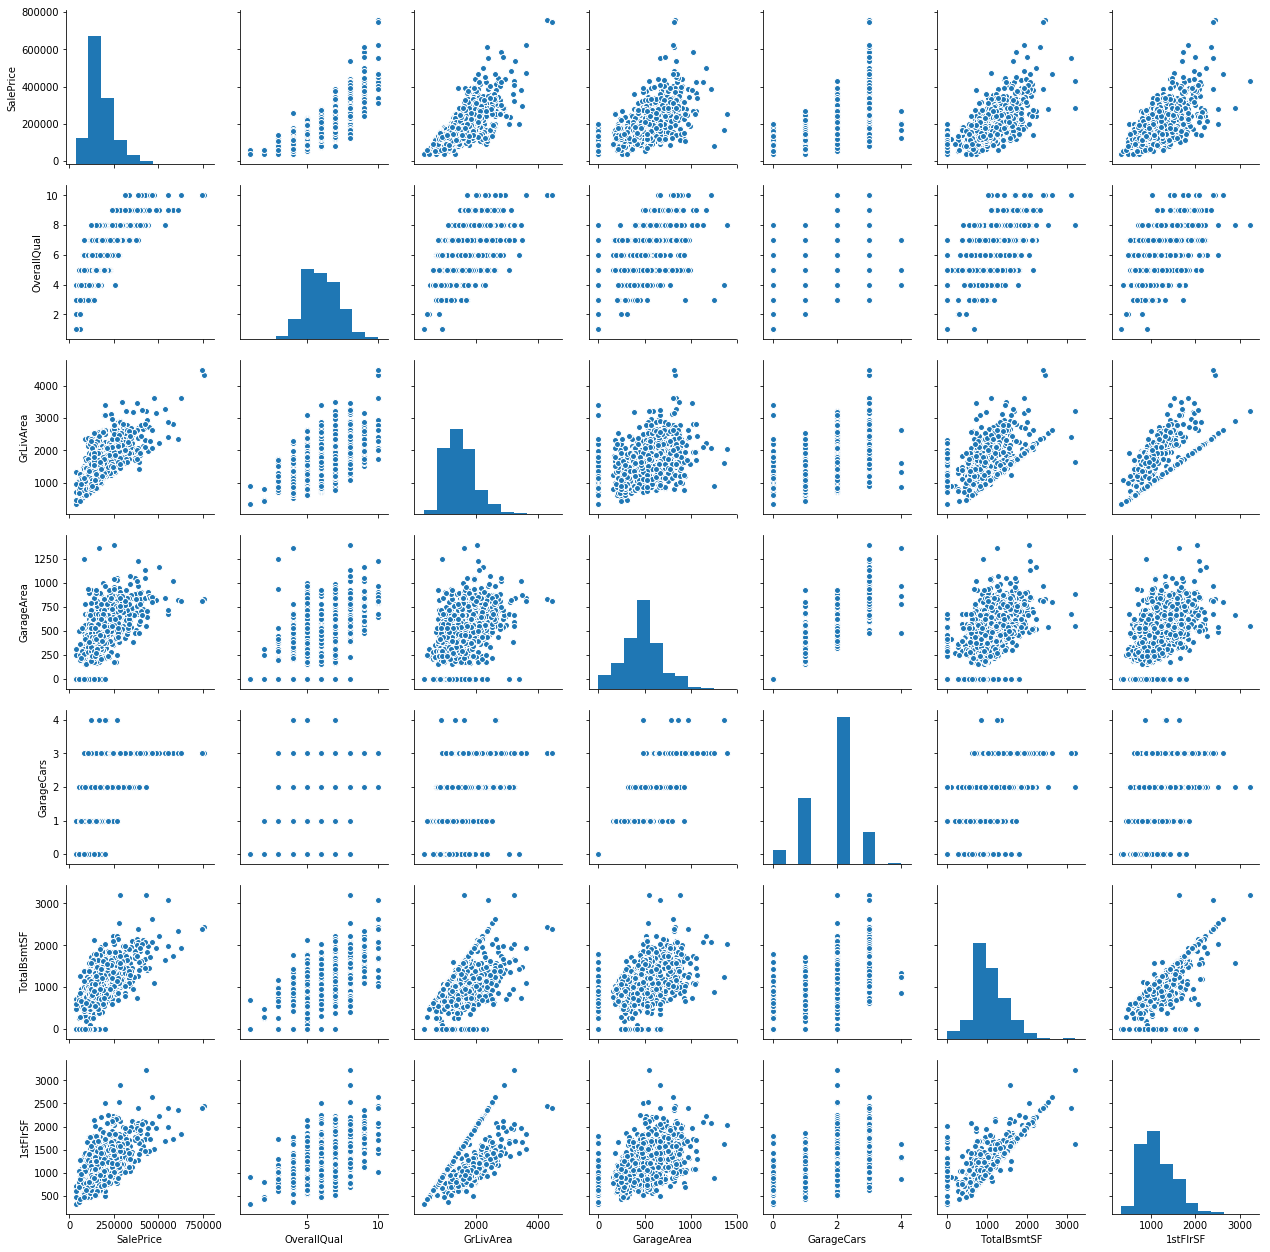

In [89]:
sns.pairplot(df[['SalePrice','OverallQual','GrLivArea','GarageArea','GarageCars','TotalBsmtSF','1stFlrSF']]) 

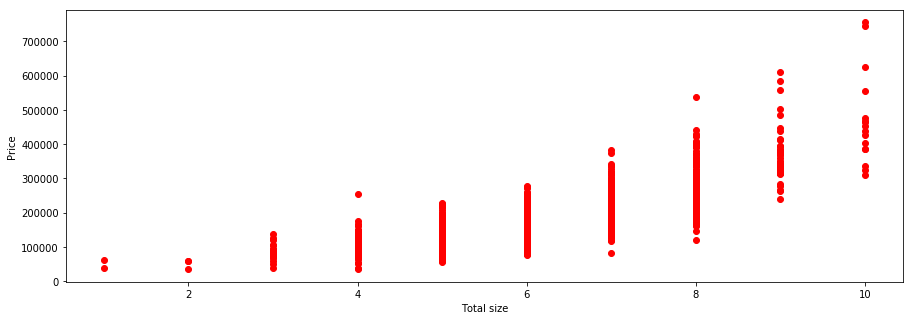

In [102]:
plt.figure(figsize=[15,5])
plt.plot(df.OverallQual,df.SalePrice, 'ro')
plt.xlabel('Total size')
plt.ylabel('Price')
plt.show()

OveraallQual is a major contributor to price forecasting

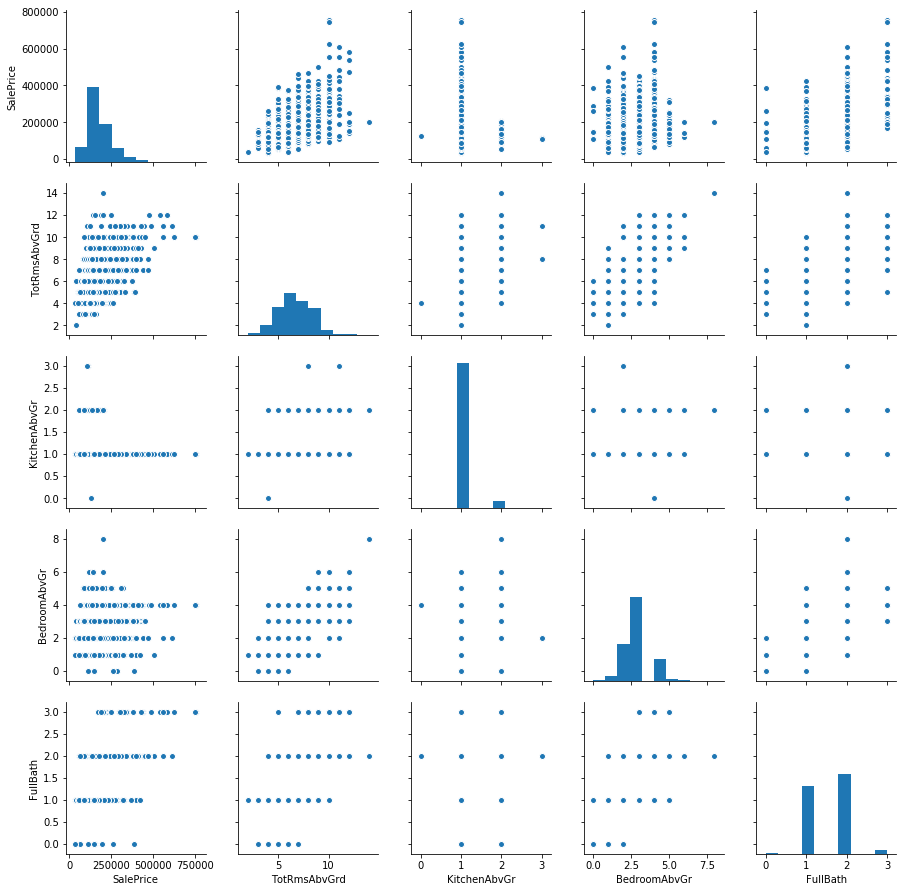

In [103]:
sns.pairplot(df[['SalePrice','TotRmsAbvGrd','KitchenAbvGr','BedroomAbvGr','FullBath']]) 

In [104]:
qual10_mask = df.OverallQual == 10

In [105]:
df_qual10 = df[qual10_mask]

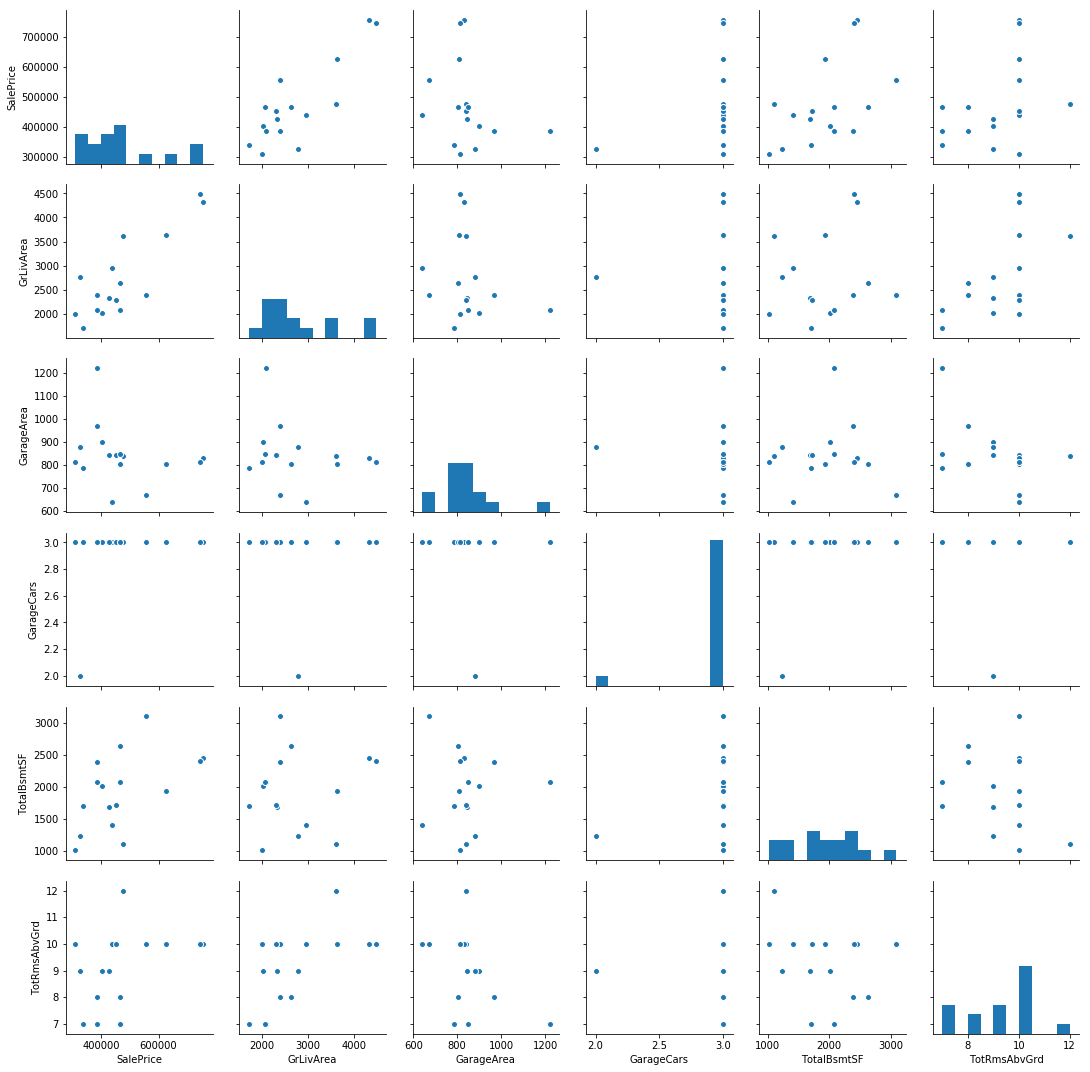

In [106]:
sns.pairplot(df_qual10[['SalePrice','GrLivArea','GarageArea','GarageCars','TotalBsmtSF','TotRmsAbvGrd']]) 

GarageCars is a major contributor to OverallQual/Price, i'll so see how i can use it by calculating the average amount of cars in each OverallQual group

In [107]:
dfOQ = df.groupby(['OverallQual']).mean()

In [108]:
col_list = ['GarageCars', 'SalePrice']
dfOQ = dfOQ[col_list]

In [109]:
dfOQ

,GarageCars,SalePrice
OverallQual,,
1,0.000000,50150.000000
2,0.666667,51770.333333
3,1.200000,87473.750000
4,1.163793,108420.655172
5,1.367758,133523.347607
6,1.689840,161603.034759
7,2.062696,207716.423197
8,2.458333,274735.535714
9,2.813953,367513.023256


In [110]:
dfOQ.drop('SalePrice',axis=1,inplace=True)

In [118]:
df = df.join(dfOQ,on='OverallQual', rsuffix='_ACars')

In [116]:
df.drop('GarageCars_ACars',axis=1,inplace=True)

In [119]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,SaleType,SaleCondition,SalePrice,DateSold,TotalSize,LivingArea,UtilitiesArea,PropAge,RemodAge,GarageCars_ACars
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,...,WD,Normal,208500,2008-02-01,11564,2566,8998,5,5,2.062696
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,...,WD,Normal,181500,2007-05-01,12584,2524,10060,31,31,1.689840
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,...,WD,Normal,223500,2008-09-01,14564,2706,11858,7,6,2.062696
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,...,WD,Abnorml,140000,2006-02-01,12937,2473,10464,91,36,2.062696
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,...,WD,Normal,250000,2008-12-01,18439,3343,15096,8,8,2.458333


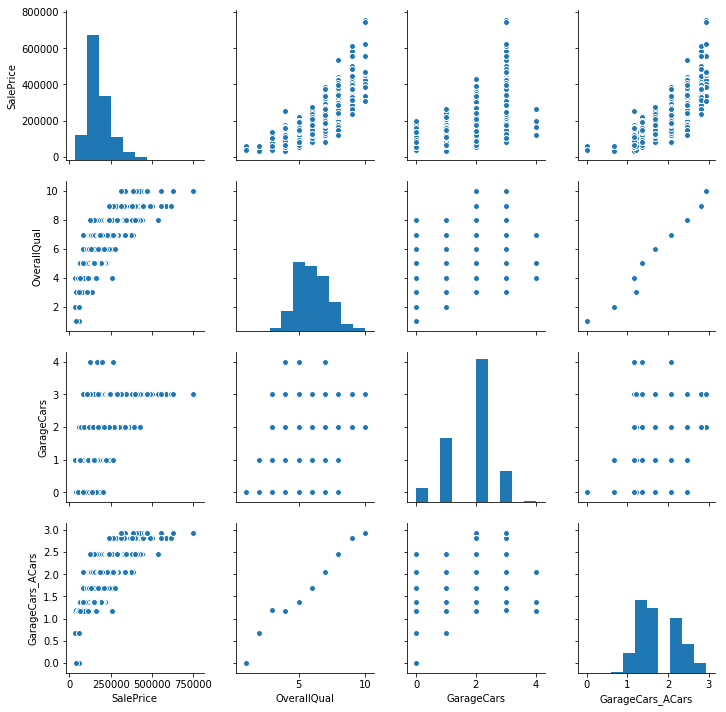

In [120]:
sns.pairplot(df[['SalePrice','OverallQual','GarageCars','GarageCars_ACars']]) 

GarageCars average per quality group seems to me slightly better than Overallqual as it reduces the volatily in lower prices

# Creating a model and assessing

In [189]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

In [190]:
model = linear_model.LinearRegression()

In [191]:
df['DateSold'] = df['DateSold'].values.astype(float)

In [192]:
df_dummies = pd.get_dummies(df)

In [193]:
X = df_dummies.drop('SalePrice', axis=1)
y = df_dummies['SalePrice']

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [195]:
X_train.shape , X_test.shape ,  y_train.shape, y_test.shape

((1093, 408), (365, 408), (1093,), (365,))

For now i'll leave the model with an intercept although no intercept at all probably fits more as there won't be a house price for a house without all the features

In [196]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [197]:
X_train['PrecidtPrice'] = model.predict(X_train)

C:\Users\ori\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [198]:
# model_rmse = np.sqrt(MSE(df_dummies['SalePrice'], 
#                        df_dummies['PrecidtPrice']))
# print("RMSE = {:.2f}".format(model_rmse))

In [199]:
model_MAE = (MAE(y_train,X_train['PrecidtPrice']))
print("MAE = {:.2f}".format(model_MAE))

MAE = 23439.80


In [200]:
r2_score(y_train,X_train.PrecidtPrice)

0.8203619733821317

82% of the variability is explained, MAE is 23k - for each house price there is an error of 23k on average

In [201]:
model2 = ensemble.GradientBoostingRegressor()
model2.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [202]:
X_train['PrecidtPrice'] = model2.predict(X_train)

C:\Users\ori\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [203]:
model2_MAE = (MAE(y_train,X_train['PrecidtPrice']))
print("MAE = {:.2f}".format(model2_MAE))

MAE = 9870.58


In [204]:
r2_score(y_train,X_train.PrecidtPrice)

0.9724885835373579

Gradient boosting improves resultes to 97% and 9.8k MAE

In [210]:
X_test['PrecidtPrice'] = model2.predict(X_test)

C:\Users\ori\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [211]:
r2_score(y_test,X_test.PrecidtPrice)

0.9254542838689963

In [212]:
model2_MAE = (MAE(y_test,X_test['PrecidtPrice']))
print("MAE = {:.2f}".format(model2_MAE))

MAE = 14826.47


Slight decrease to 92% and 14k MAE but overall looks reasonable maybe with a small overfit